<a href="https://colab.research.google.com/github/gfeyzakorkmaz/Tries/blob/main/PPJJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
path = '/content/drive/MyDrive/Dataset/ALL.xlsx'


In [4]:
df = pd.read_excel(path)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df_filtered = df[df['Profit'] > 500]

print(df_filtered.head().to_markdown(index=False, numalign="left", stralign="left"))

| Row   | Order Priority   | Order Date          | Order   | Discount   | Unit Price   | Order Quantity   | Sales   | Profit   | Shipping Cost   | Product Base Margin   | Department      | Container   | Category               | Item                                                                                       | Customer Segment   | Customer   | Customer Name   | Region        | State            | Country / Region         | City          | Postal Code   | Ship Date           | Ship Mode      | SubRegion   | Column1   | Column2         | Column3       | Customer ID   | Age   | Gender   | Total Spent   | Converted   | Comments             | Purchased Category   | Stock   | Region.1   | Income Level   | Discount Availed   | Customer Tenure (Years)   | Campaign    | Return Rate (%)   | Website Visit Frequency   | Average Cart Value   | Total Spent Diff   | Spending Rank   | Rolling Return Rate   | High Spender   | Customer Tenure Quarter   | Customer Word Count   | Sentiment   | Don

In [ ]:
print(df['Category'].nunique())

print(df['Category'].unique())

17
['Storage & Organization' 'Binders and Binder Accessories'
 'Chairs & Chairmats' 'Paper' 'Pens & Art Supplies' 'Office Machines'
 'Office Furnishings' 'Tables' 'Computer Peripherals'
 'Telephones and Communication' 'Bookcases' 'Copiers and Fax' 'Appliances'
 'Labels' 'Rubber Bands' 'Envelopes' 'Scissors, Rulers and Trimmers']


In [ ]:
average_sales = df.groupby(['Category', 'Customer Segment'])['Sales'].mean()

print(average_sales)

Category                        Customer Segment
Appliances                      Consumer            1616.721849
                                Corporate           1659.630922
                                Home Office         1593.783029
                                Small Business      1903.055962
Binders and Binder Accessories  Consumer             908.340901
                                                       ...     
Tables                          Small Business      5571.135530
Telephones and Communication    Consumer            2095.919365
                                Corporate           2638.593739
                                Home Office         2601.463683
                                Small Business      2473.309524
Name: Sales, Length: 68, dtype: float64


In [ ]:
df['Order Month'] = df['Order Date'].dt.month

print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Row   | Order Priority   | Order Date          | Order   | Discount   | Unit Price   | Order Quantity   | Sales   | Profit   | Shipping Cost   | Product Base Margin   | Department      | Container   | Category                       | Item                                                             | Customer Segment   | Customer   | Customer Name   | Region        | State      | Country / Region         | City          | Postal Code   | Ship Date           | Ship Mode      | SubRegion   | Column1   | Column2         | Column3       | Customer ID   | Age   | Gender   | Total Spent   | Converted   | Comments                      | Purchased Category   | Stock   | Region.1   | Income Level   | Discount Availed   | Customer Tenure (Years)   | Campaign     | Return Rate (%)   | Website Visit Frequency   | Average Cart Value   | Total Spent Diff   | Spending Rank   | Rolling Return Rate   | High Spender   | Customer Tenure Quarter   | Customer Word Count   | Sentiment   | Donor Potential  

In [5]:
top_5_customers = df.groupby('Customer')['Sales'].sum().nlargest(5)

print(top_5_customers)

Customer
2857    207568.56
3395    191042.70
3130    175867.91
1114    169455.02
1780    156414.49
Name: Sales, dtype: float64


In [6]:
correlation = df['Sales'].corr(df['Profit'])

print(correlation)

0.8928091623995417


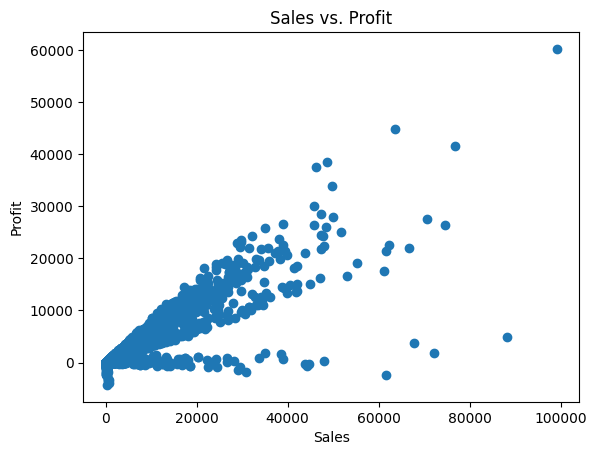

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['Sales'], df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs. Profit')
plt.show()

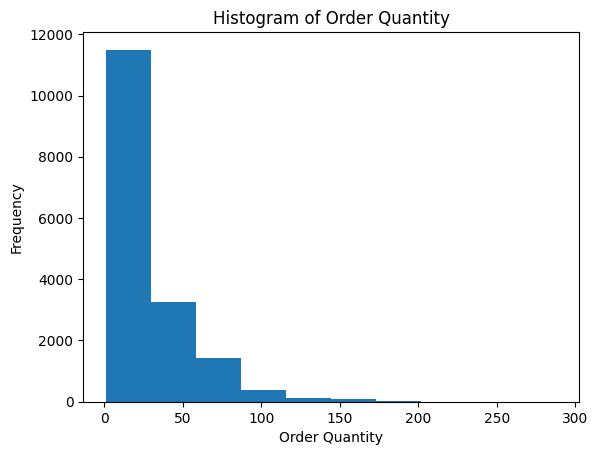

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['Order Quantity'])
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Order Quantity')
plt.show()

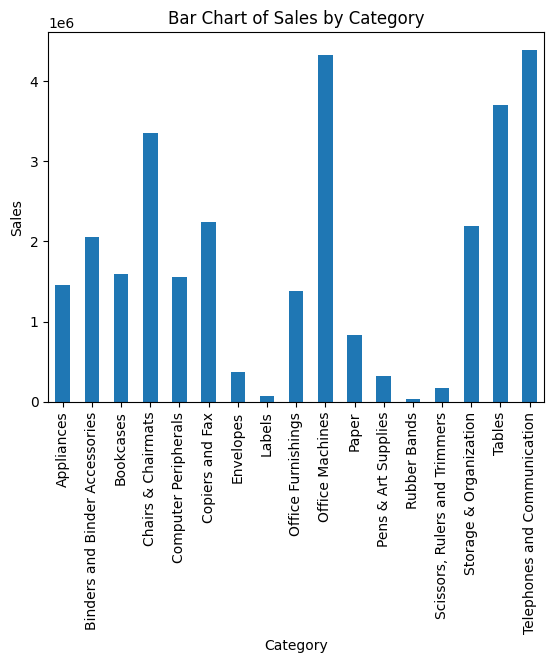

In [9]:
import matplotlib.pyplot as plt

sales_by_category = df.groupby('Category')['Sales'].sum()
sales_by_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Bar Chart of Sales by Category')
plt.show()

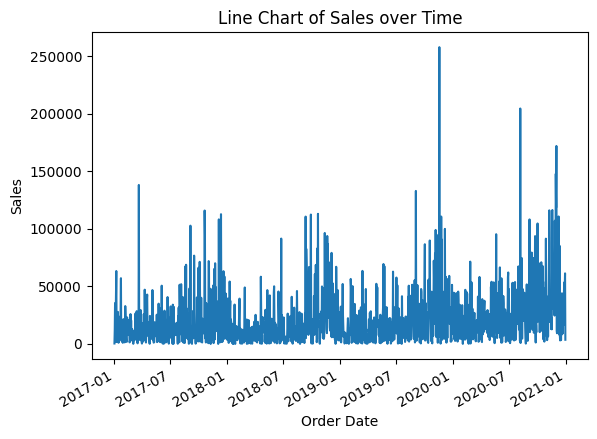

In [10]:
import matplotlib.pyplot as plt

sales_over_time = df.groupby('Order Date')['Sales'].sum()
sales_over_time.plot(kind='line')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Line Chart of Sales over Time')
plt.show()

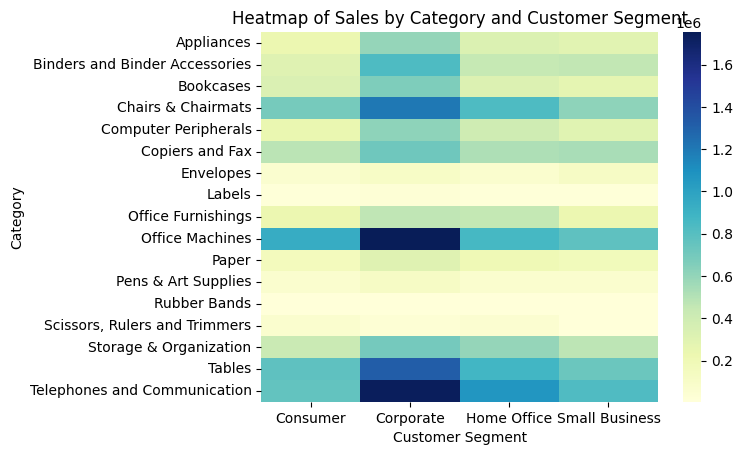

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_heatmap = df.pivot_table(index='Category', columns='Customer Segment', values='Sales', aggfunc='sum')
sns.heatmap(sales_heatmap, cmap='YlGnBu')
plt.xlabel('Customer Segment')
plt.ylabel('Category')
plt.title('Heatmap of Sales by Category and Customer Segment')
plt.show()

In [12]:

sales_pivot = df.pivot_table(index='Category', columns='Customer Segment', values='Sales', aggfunc='sum')


print(sales_pivot)

Customer Segment                 Consumer   Corporate  Home Office  \
Category                                                             
Appliances                      236041.39   594147.87    331506.87   
Binders and Binder Accessories  312469.27   835857.42    448876.51   
Bookcases                       334026.73   665019.05    325840.25   
Chairs & Chairmats              693624.25  1206148.61    835584.89   
Computer Peripherals            238383.00   618399.89    399254.71   
Copiers and Fax                 477978.50   719309.00    517943.00   
Envelopes                        64928.10   113315.13     73224.00   
Labels                           12847.92    27253.50     14534.73   
Office Furnishings              236698.65   463555.38    450482.96   
Office Machines                 934181.74  1753632.54    860340.23   
Paper                           157070.22   308144.56    198750.32   
Pens & Art Supplies              69107.87   115618.53     70110.07   
Rubber Bands        

In [13]:
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days


print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Row   | Order Priority   | Order Date          | Order   | Discount   | Unit Price   | Order Quantity   | Sales   | Profit   | Shipping Cost   | Product Base Margin   | Department      | Container   | Category                       | Item                                                             | Customer Segment   | Customer   | Customer Name   | Region        | State      | Country / Region         | City          | Postal Code   | Ship Date           | Ship Mode      | SubRegion   | Column1   | Column2         | Column3       | Customer ID   | Age   | Gender   | Total Spent   | Converted   | Comments                      | Purchased Category   | Stock   | Region.1   | Income Level   | Discount Availed   | Customer Tenure (Years)   | Campaign     | Return Rate (%)   | Website Visit Frequency   | Average Cart Value   | Total Spent Diff   | Spending Rank   | Rolling Return Rate   | High Spender   | Customer Tenure Quarter   | Customer Word Count   | Sentiment   | Donor Potential  

In [14]:
average_shipping_time = df.groupby('Ship Mode')['Shipping Time'].mean()

print(average_shipping_time)

Ship Mode
Delivery Truck   -0.191266
Express Air       0.702950
Regular Air       0.407038
Name: Shipping Time, dtype: float64


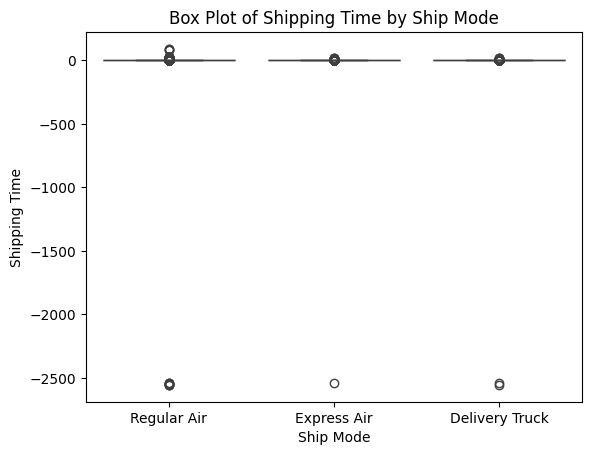

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Ship Mode', y='Shipping Time', data=df)
plt.xlabel('Ship Mode')
plt.ylabel('Shipping Time')
plt.title('Box Plot of Shipping Time by Ship Mode')
plt.show()

In [16]:
percentage_returned = (df['Column1'].value_counts(normalize=True) * 100)['Returned']

print(percentage_returned)

0.08517887563884156


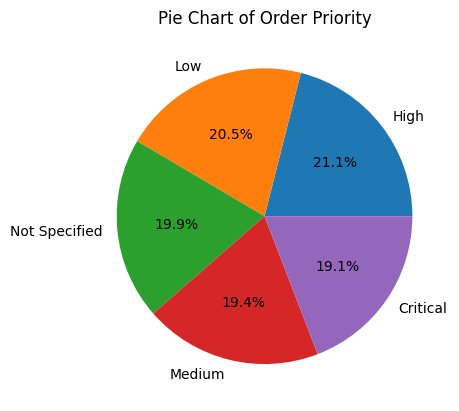

In [17]:
import matplotlib.pyplot as plt

order_priority_counts = df['Order Priority'].value_counts()
plt.pie(order_priority_counts, labels=order_priority_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Order Priority')
plt.show()